# Визуализация при помощи библиотеки Seaborn

Существует несколько частых жалоб на ``matplotlib``:

- API Matplotlib относительно низкоуровневый, и потому требует много строк шаблонного кода
- Matplotlib была выпущени на десятилетие раньше, чем Pandas, и потому не ориентирована на работы с DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
# создаем случайные блуждания
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
y

array([[  1.76405235,   0.40015721,   0.97873798,   2.2408932 ,
          1.86755799,  -0.97727788],
       [  2.71414076,   0.2488    ,   0.87551913,   2.6514917 ,
          2.01160156,   0.47699563],
       [  3.47517849,   0.37047502,   1.31938237,   2.98516603,
          3.50568063,   0.27183736],
       ...,
       [-34.82533536, -44.37245964, -32.86660099,  31.93843765,
          9.67250307,  -9.16537805],
       [-35.4875268 , -45.95006671, -33.20716103,  30.63521756,
         10.13925372,  -9.00427173],
       [-35.16749487, -43.87089005, -34.11462701,  30.44281336,
          8.92673797,  -9.08487024]])

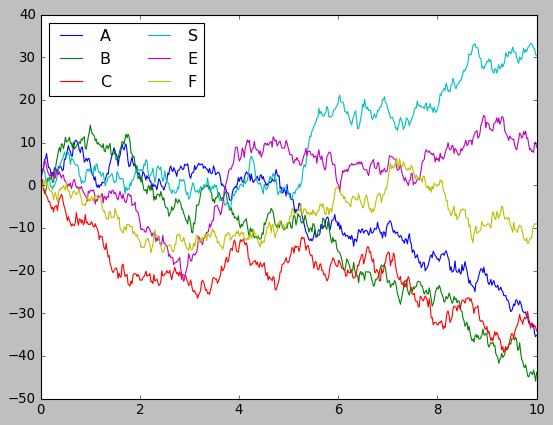

In [3]:
# рисуем график mpl
plt.plot(x, y)
plt.legend('ABCSEF', ncol=2, loc='upper left')

Теперь посмотрим как это можно сделать при помощи ``Seaborn``

In [4]:
import seaborn as sns
sns.set() # задаем стиль

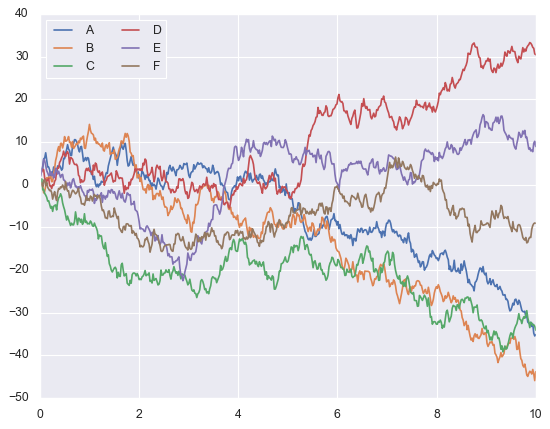

In [5]:
# рисуем график mpl
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Анализируем графики библиотеки Seaborn

Основная идея библиотеки Seaborn - предоставление высокоуровневых команд для создания множества различных типов графиков, удобных для исследования стат данных и даже подгонки стат моделей.

### Гистограммы, KDE и плотности

Зачастую все, что нужно сделать при визуализации стат данных, - это построить гистограмму или график совместного распределения переменных.

In [8]:
data = np.random.multivariate_normal(
    [0, 0],
    [[5, 2], [2, 2]],
    size = 2000
)

data

array([[ 0.65100647, -0.84340823],
       [-0.22004134,  0.17109741],
       [-1.09695975, -0.97639388],
       ...,
       [ 1.07870131,  2.67082645],
       [ 1.58281569, -0.10860224],
       [ 0.91944609, -0.19958822]])

In [9]:
data = pd.DataFrame(data, columns=['x', 'y'])
data

,x,y
0,0.651006,-0.843408
1,-0.220041,0.171097
2,-1.096960,-0.976394
3,-3.080433,-1.692582
4,0.287159,-0.929452
...,...,...
1995,-0.090580,-0.042041
1996,-0.783610,-0.988111
1997,1.078701,2.670826
1998,1.582816,-0.108602


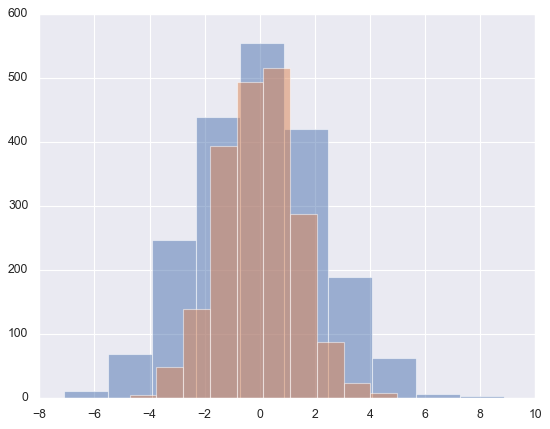

In [11]:
for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Вместо гистограммы можно получить гладкую оценку распределения путем ядерной оценки плотности распределения, которую ``Seaborn`` выполняет с помощью ф-ии ``sns.kdeplot``

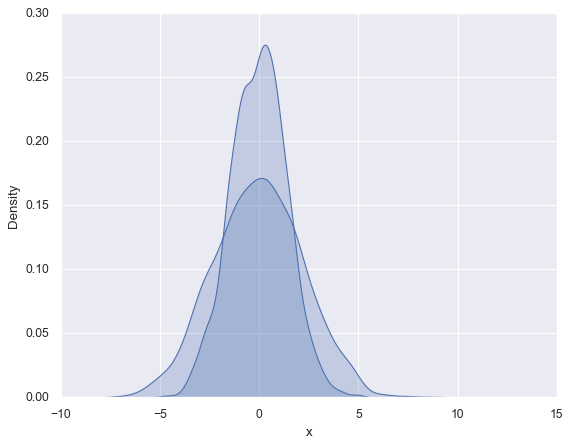

In [12]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

С помощью ф-ии ``distplot`` можно сочетать гистограммы и KDE:

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

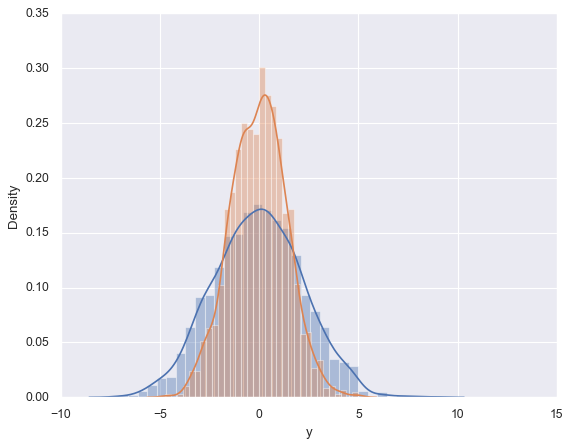

In [13]:
sns.distplot(data['x'])
sns.distplot(data['y'])

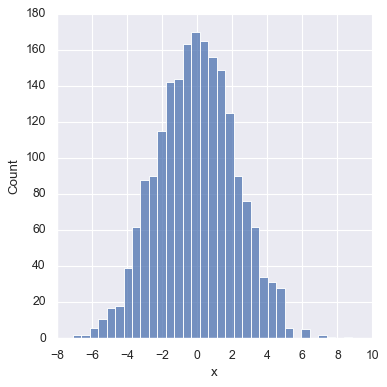

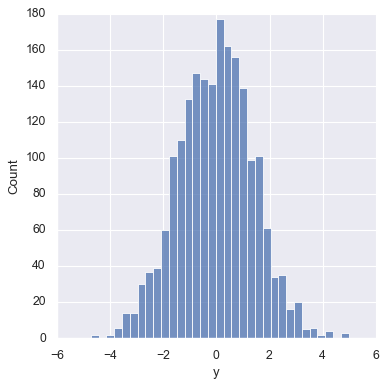

In [18]:
sns.displot(data['x'])
# sns.histplot(data['x'])
sns.displot(data['y'])

<AxesSubplot:ylabel='Density'>

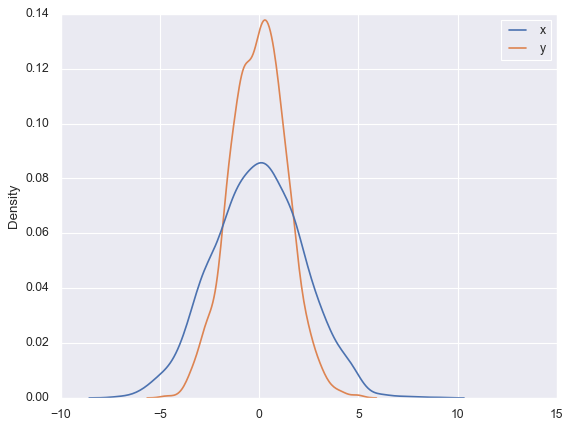

In [22]:
# если передать ф-ии KDE весь двумерный набор данных
sns.kdeplot(data=data)

# sns.kdeplot(data) по позиции нынче не передается - будет ошибка
# и двумерной она не стала кстати

In [21]:
# sns.kdeplot?

<AxesSubplot:xlabel='x', ylabel='Density'>

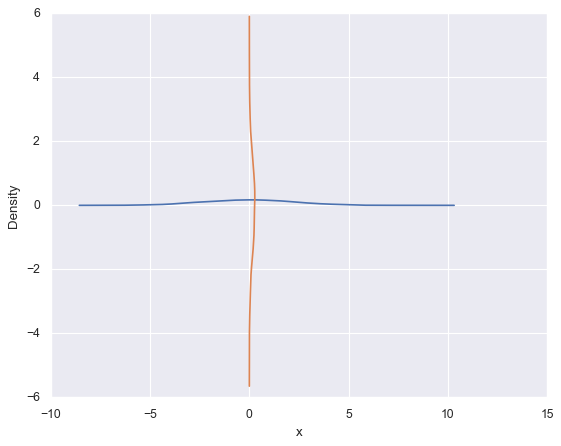

In [26]:
ax = sns.kdeplot(x=data['x'])
sns.kdeplot(y=data['y'], ax=ax)
# что-то не то

<AxesSubplot:xlabel='x', ylabel='y'>

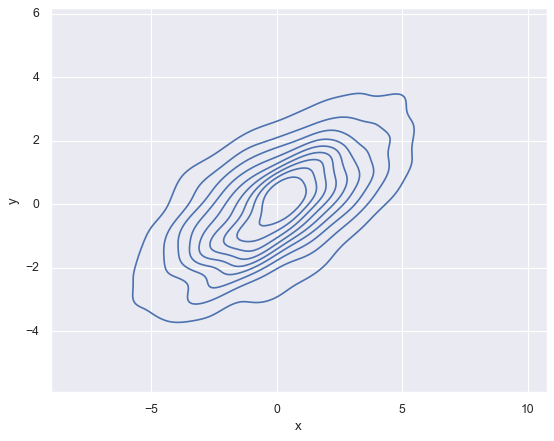

In [28]:
sns.kdeplot(x=data['x'], y=data['y'])
# ОНО!

Посмотреть на совместное распределение и частное распределение можно, воспользовавшись ф-ией ``sns.jointplot``

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


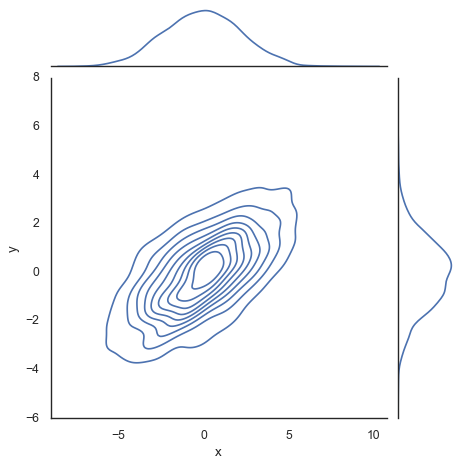

In [29]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

In [33]:
# sns.jointplot?
# sns.jointplot(
#     *,
#     x=None,
#     y=None,
#     data=None,
#     kind='scatter',
#     color=None,
#     height=6,
#     ratio=5,
#     space=0.2,
#     dropna=False,
#     xlim=None,
#     ylim=None,
#     marginal_ticks=False,
#     joint_kws=None,
#     marginal_kws=None,
#     hue=None,
#     palette=None,
#     hue_order=None,
#     hue_norm=None,
#     **kwargs,
# )

# Parameters
# ----------
# x, y : vectors or keys in ``data``
#     Variables that specify positions on the x and y axes.
# data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
#     Input data structure. Either a long-form collection of vectors that can be
#     assigned to named variables or a wide-form dataset that will be internally
#     reshaped.
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
#     Kind of plot to draw. See the examples for references to the underlying functions.
# color : :mod:`matplotlib color <matplotlib.colors>`
#     Single color specification for when hue mapping is not used. Otherwise, the
#     plot will try to hook into the matplotlib property cycle.
# height : numeric
#     Size of the figure (it will be square).
# ratio : numeric
#     Ratio of joint axes height to marginal axes height.
# space : numeric
#     Space between the joint and marginal axes
# dropna : bool
#     If True, remove observations that are missing from ``x`` and ``y``.
# {x, y}lim : pairs of numbers
#     Axis limits to set before plotting.
# marginal_ticks : bool
#     If False, suppress ticks on the count/density axis of the marginal plots.
# {joint, marginal}_kws : dicts
#     Additional keyword arguments for the plot components.
# hue : vector or key in ``data``
#     Semantic variable that is mapped to determine the color of plot elements.
#     Semantic variable that is mapped to determine the color of plot elements.
# palette : string, list, dict, or :class:`matplotlib.colors.Colormap`
#     Method for choosing the colors to use when mapping the ``hue`` semantic.
#     String values are passed to :func:`color_palette`. List or dict values
#     imply categorical mapping, while a colormap object implies numeric mapping.
# hue_order : vector of strings
#     Specify the order of processing and plotting for categorical levels of the
#     ``hue`` semantic.
# hue_norm : tuple or :class:`matplotlib.colors.Normalize`
#     Either a pair of values that set the normalization range in data units
#     or an object that will map from data units into a [0, 1] interval. Usage
#     implies numeric mapping.
# kwargs
#     Additional keyword arguments are passed to the function used to
#     draw the plot on the joint Axes, superseding items in the
#     ``joint_kws`` dictionary.


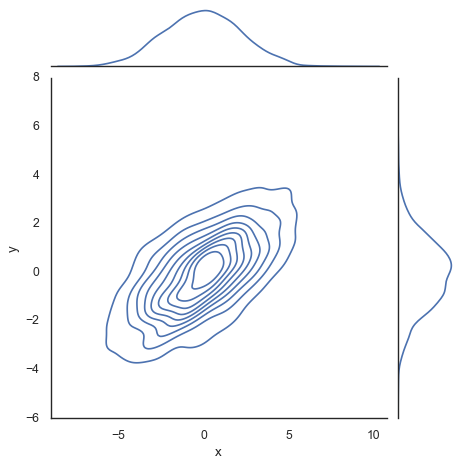

In [35]:
with sns.axes_style('white'):
    sns.jointplot(x = data['x'], y = data['y'], data=data, kind='kde')
# вот так теперь правильно

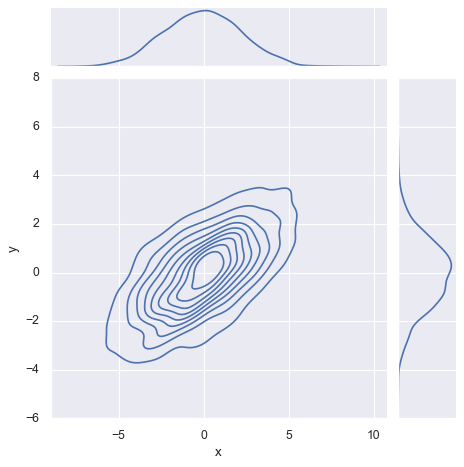

In [36]:
with sns.axes_style():
    sns.jointplot(x = data['x'], y = data['y'], data=data, kind='kde')

In [37]:
# sns.axes_style?
# Parameters
# ----------
# style : None, dict, or one of {darkgrid, whitegrid, dark, white, ticks}
#     A dictionary of parameters or the name of a preconfigured style.
# rc : dict, optional
#     Parameter mappings to override the values in the preset seaborn
#     style dictionaries. This only updates parameters that are
#     considered part of the style definition.

In [39]:
# sns.set_theme?
# sns.set_theme(
#     context='notebook',
#     style='darkgrid',
#     palette='deep',
#     font='sans-serif',
#     font_scale=1,
#     color_codes=True,
#     rc=None,
# )
# Docstring:
# Set aspects of the visual theme for all matplotlib and seaborn plots.

# This function changes the global defaults for all plots using the
# :ref:`matplotlib rcParams system <matplotlib:matplotlib-rcparams>`.
# The themeing is decomposed into several distinct sets of parameter values.

# The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
# and :doc:`color palette <../tutorial/color_palettes>` tutorials.

# Parameters
# ----------
# context : string or dict
#     Scaling parameters, see :func:`plotting_context`.
# style : string or dict
#     Axes style parameters, see :func:`axes_style`.
# palette : string or sequence
#     Color palette, see :func:`color_palette`.
# font : string
#     Font family, see matplotlib font manager.
# font_scale : float, optional
#     Separate scaling factor to independently scale the size of the
#     font elements.
# color_codes : bool
#     If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
#     color codes (e.g. "b", "g", "r", etc.) to the colors from this palette.
# rc : dict or None
#     Dictionary of rc parameter mappings to override the above.

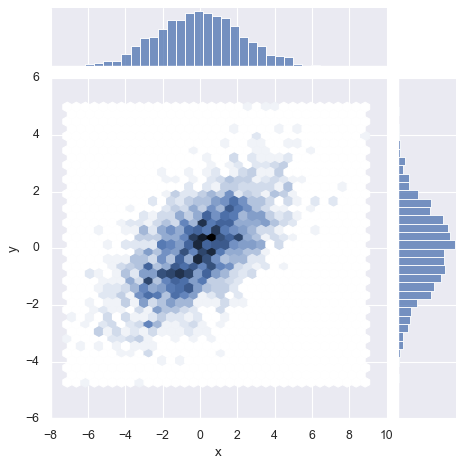

In [40]:
with sns.axes_style():
    sns.jointplot(x = data['x'], y = data['y'], data=data, kind='hex')

###### При обобщении графиков совместных распределений на наборы данных более высоких размерностей мы постепенно приходим к ``графикам пар (pair plots)``. Они очень удобны для изучения зависимостей м/у многомерными данными, когда необходимо построить графики всех пар значений.

In [41]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


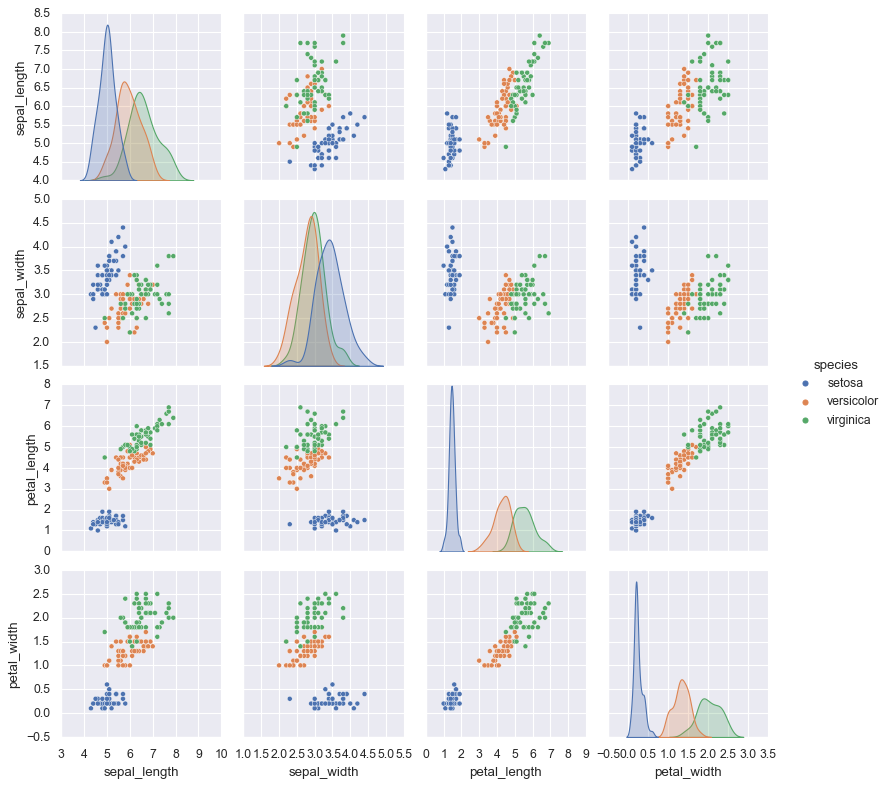

In [42]:
sns.pairplot(iris, hue='species', size=2.5)

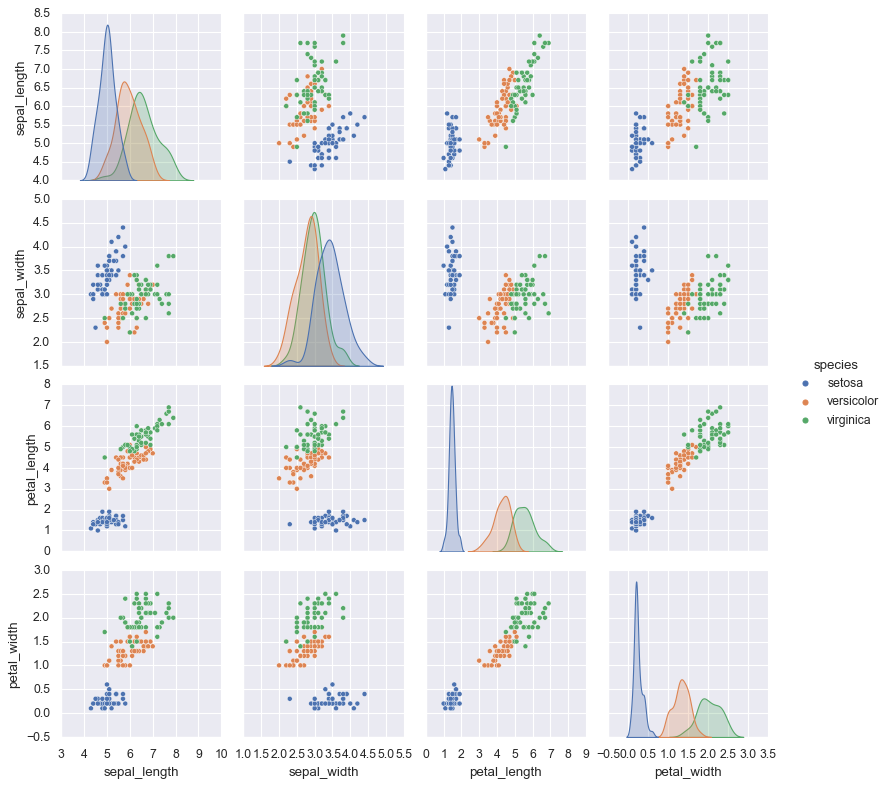

In [43]:
sns.pairplot(iris, hue='species', height=2.5)

## Фасетные гистограммы

Гистограммы подмножеств

In [44]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


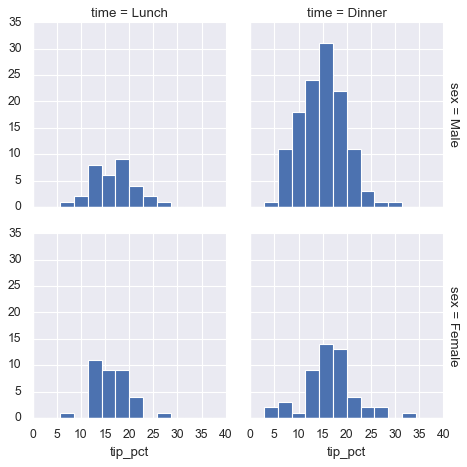

In [47]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

### Графики факторов

Позволяют просматривать распределение параметра по интервалам, задаваемым посредством любого другого параметра

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


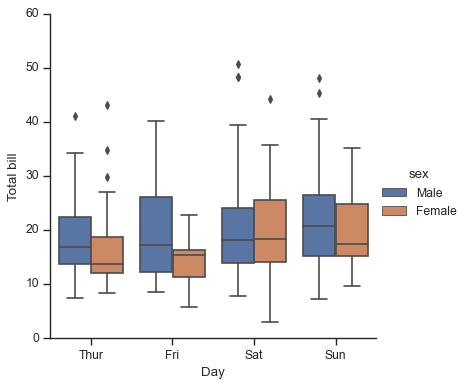

In [48]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', 
                       data=tips,
                       kind='box'
                       )
    g.set_axis_labels('Day', 'Total bill')

### Совместные распределения

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


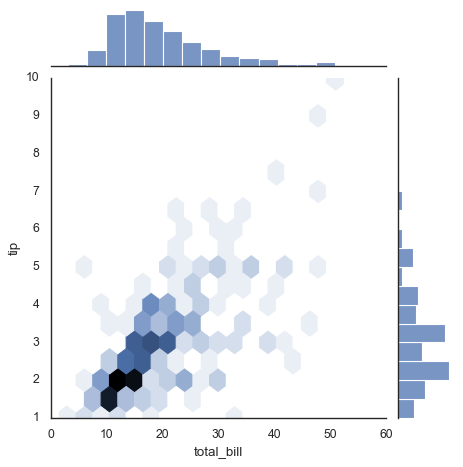

In [49]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

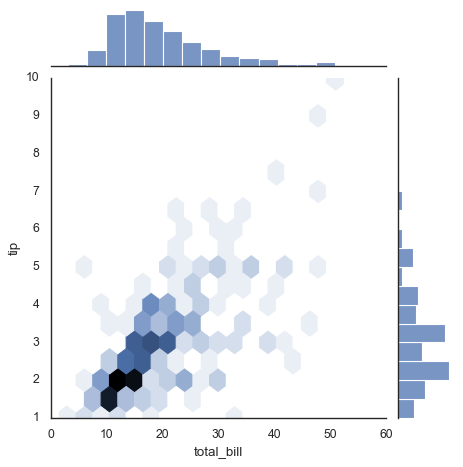

In [50]:
with sns.axes_style('white'):
    sns.jointplot(x = tips['total_bill'], y = tips['tip'], data=tips, kind='hex')

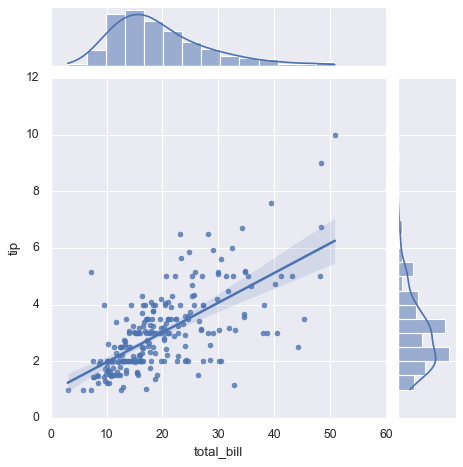

In [51]:
# автоматическая ядерная оценка плотности распределения и регрессию
sns.jointplot(x = tips['total_bill'], y = tips['tip'], data=tips, kind='reg')
# сильно

#### Столбчатые диаграммы

Графики временных рядов можно строить с помощью ф-ии ``sns.factorplot``

In [52]:
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


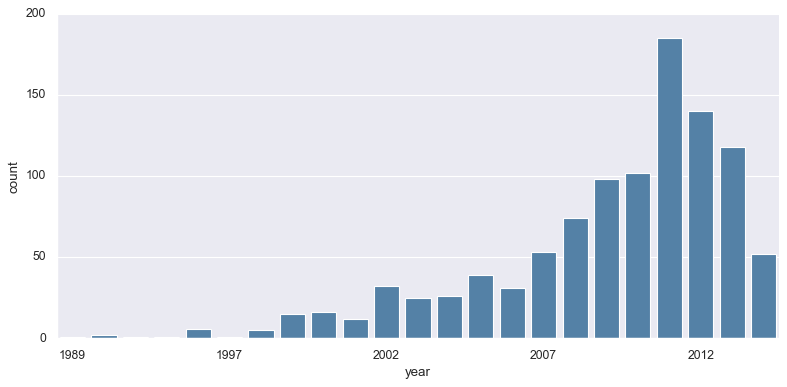

In [53]:
g = sns.factorplot('year', data=planets, aspect=2,
                   kind='count', color='steelblue')
g.set_xticklabels(step=5)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


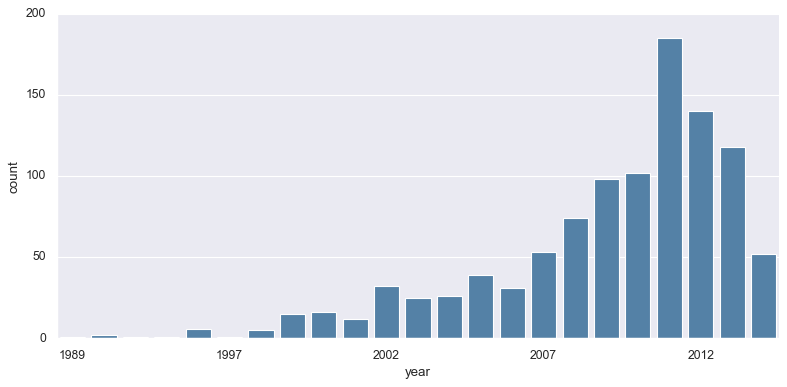

In [57]:
g = sns.catplot('year', data=planets, aspect=2,
                   kind='count', color='steelblue')
g.set_xticklabels(step=5)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


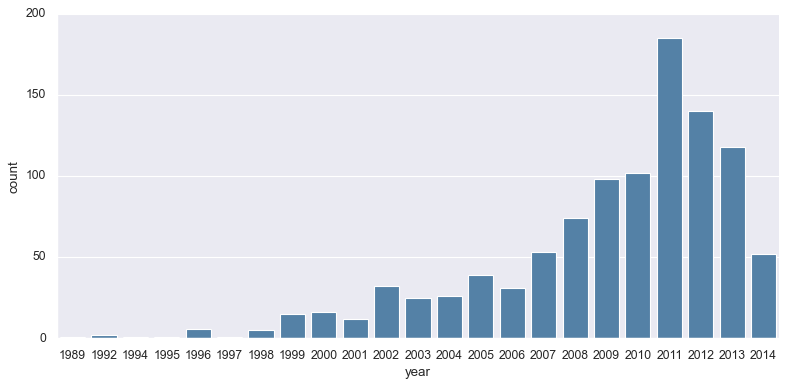

In [59]:
sns.catplot('year', data=planets, aspect=2,
                   kind='count', color='steelblue')
# g.set_xticklabels(step=5)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

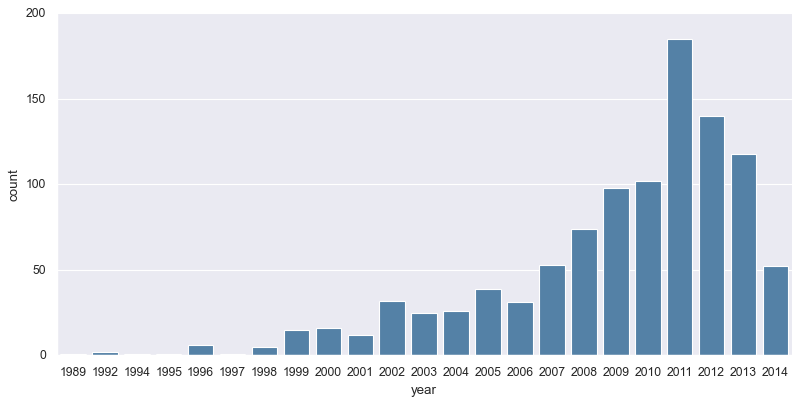

In [62]:
sns.catplot(x = planets['year'], data=planets, aspect=2,
                   kind='count', color='steelblue')

In [66]:
sns.catplot?

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

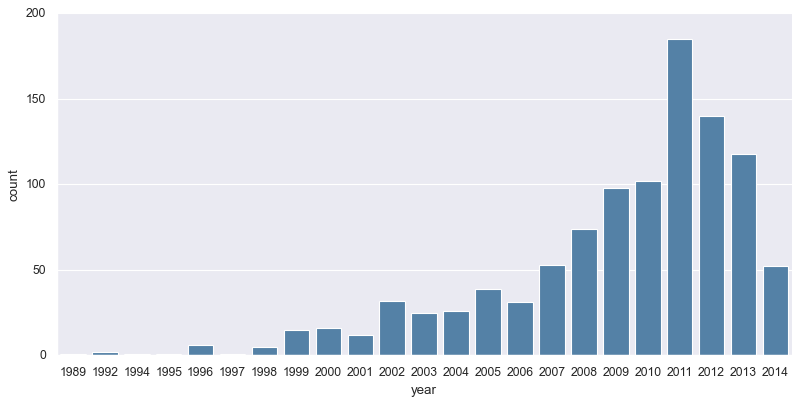

In [65]:
sns.catplot(x = planets.year, data=planets, aspect=2,
                   kind='count', color='steelblue')

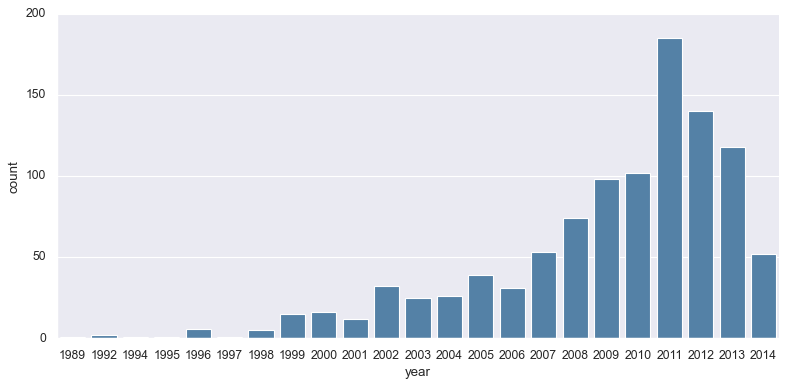

In [67]:
sns.catplot(x = 'year', data=planets, aspect=2,
                   kind='count', color='steelblue')
# ларчик просто открывался

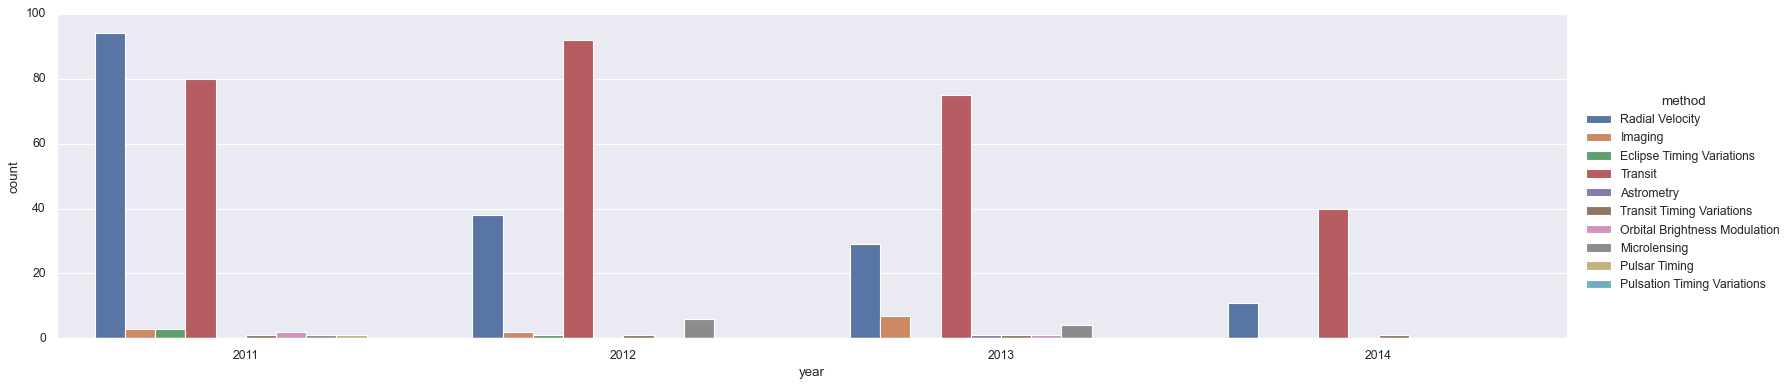

In [69]:
sns.catplot(x = 'year', data=planets, aspect=4.0,
               kind='count',
               hue='method',
               order=range(2011, 2015))

## Пример: время прохождения марафона

In [70]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  836k    0  2742    0     0   4042      0  0:03:31 --:--:--  0:03:31  4044
100  836k  100  836k    0     0   984k      0 --:--:-- --:--:-- --:--:--  984k


In [71]:
data = pd.read_csv('data/marathon-data.csv')
data

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
...,...,...,...,...
37245,18,M,04:24:24,09:32:57
37246,36,M,04:35:43,09:33:28
37247,51,M,04:22:35,09:33:40
37248,55,W,04:58:06,10:00:40


In [72]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [73]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [74]:
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

In [75]:
data

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59
...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57
37246,36,M,0 days 04:35:43,0 days 09:33:28
37247,51,M,0 days 04:22:35,0 days 09:33:40
37248,55,W,0 days 04:58:06,0 days 10:00:40


In [76]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [78]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9
data

C:\Users\Admin\AppData\Local\Temp/ipykernel_1568/770022997.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['split_sec'] = data['split'].astype(np.int64) / 1E9
C:\Users\Admin\AppData\Local\Temp/ipykernel_1568/770022997.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['final_sec'] = data['final'].astype(np.int64) / 1E9


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0
...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0


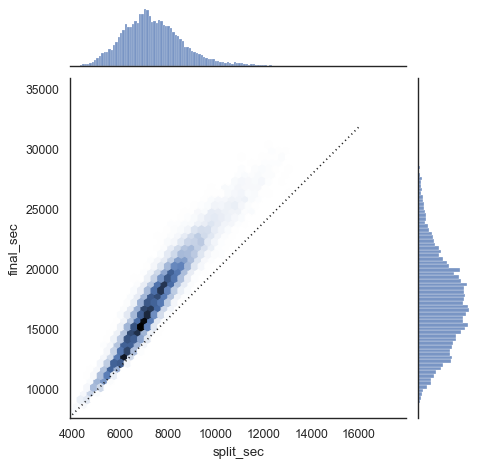

In [81]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [82]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842
...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0,0.077057
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0,0.038421
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0,0.084544
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0,0.007436


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


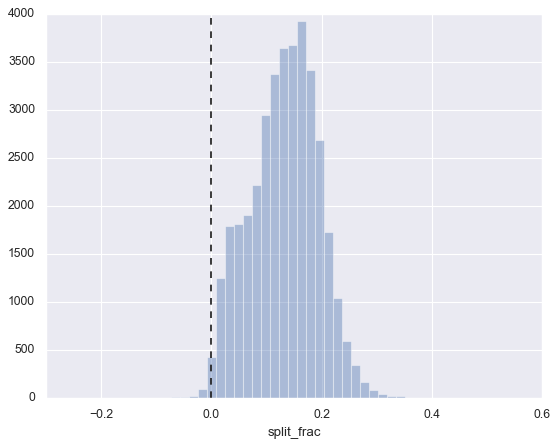

In [83]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--")

In [84]:
sum(data.split_frac < 0)

251

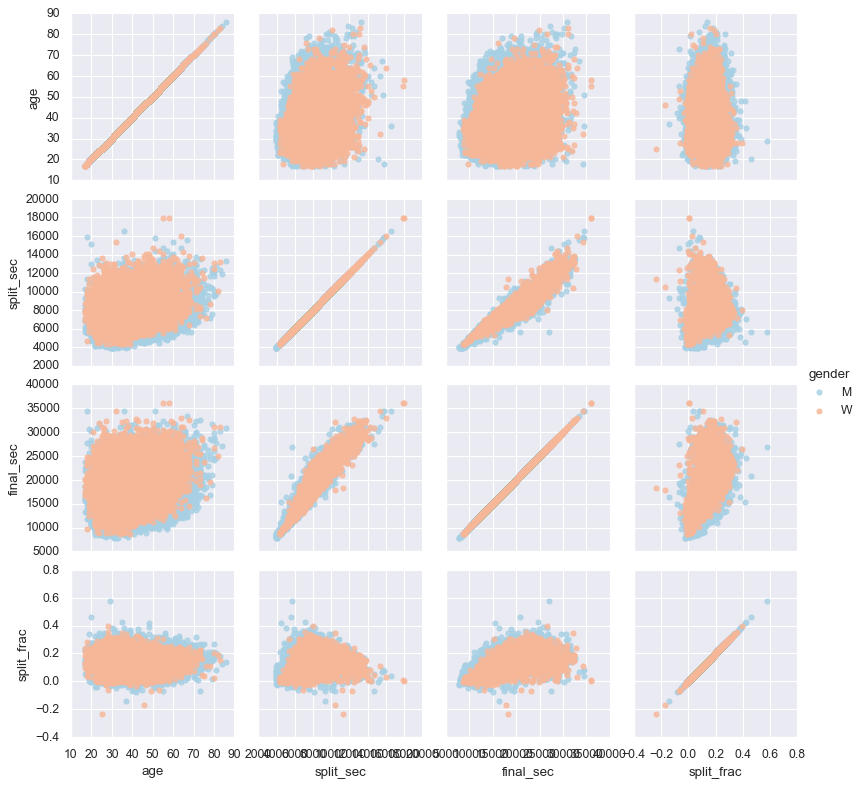

In [85]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

Text(0.5, 0, 'split_frac')

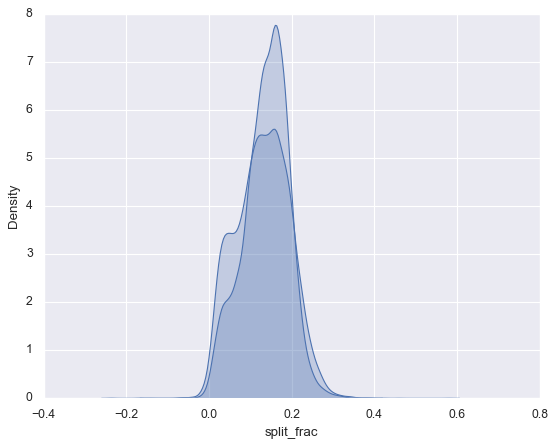

In [86]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='split_frac'>

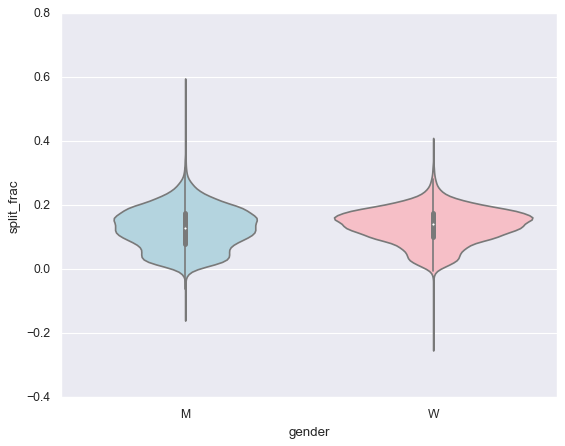

In [87]:
# скрипичные диаграммы
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"])

In [88]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30
...,...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0,0.077057,10
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0,0.038421,30
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0,0.084544,50
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0,0.007436,50


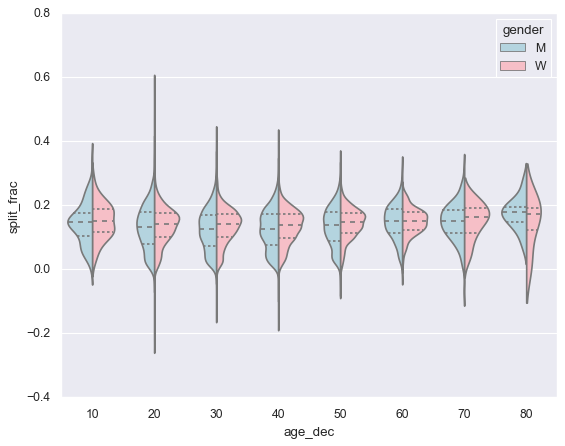

In [90]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, 
                   inner="quartile",
                   palette=["lightblue", "lightpink"])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


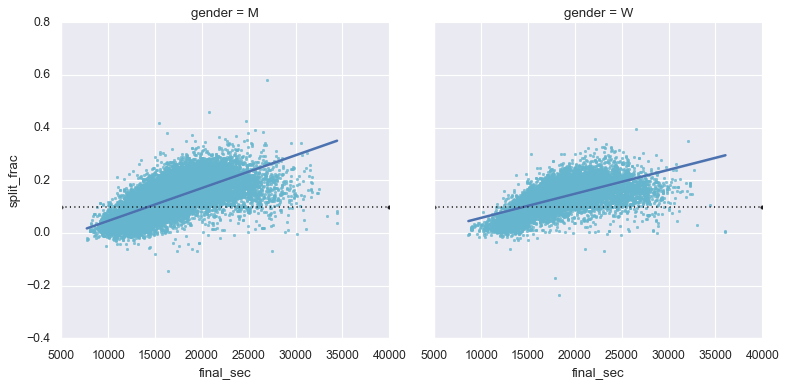

In [91]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")